In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing import image
import numpy as np
from pathlib import Path
import joblib

2022-09-04 16:37:27.002705: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-04 16:37:27.783147: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi

In [2]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.model_selection import train_test_split
import joblib

# Load data set


In [3]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/train.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)


,filepath,classification
0,A558691-12-31-1900-NA-CHEST_AP_VIEWONLY-55436-...,positive
1,MIDRC-RICORD-1C-419639-003029-68072-0.png,positive


In [4]:
df_data.groupby('classification').count()

,filepath
classification,
negative,3358
positive,3838


In [5]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [6]:
import os
from PIL import Image
from tensorflow.keras.preprocessing import image

In [7]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img, count)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BF8E9940> 2
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BF8E96A0> 19
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEACAC0> 24
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEACB50> 27
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BEEACCA0> 32
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BEEACDF0> 37
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEAC9D0> 38
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEB4100> 40
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEB4040> 46
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BEEB4130> 47
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEB4190> 49
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEB4370> 61

In [8]:
len(images)

7196

In [9]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([3358, 3838]))

In [10]:
# Create a single numpy array with all the images we loaded
x_train = np.array(images)

# Also convert the labels to a numpy array
y_train = np.array(labels)

In [11]:
x_train.shape

(7196, 224, 224, 3)

In [12]:
y_train.shape

(7196,)

In [13]:
# Normalize image data to 0-to-1 range
#x_train /= 255 use vgg16 preprocessing instead

#print(x_train[0], x_train.shape)

Load validation data

In [14]:
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/val.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)

,filepath,classification
0,A866354-12-30-1900-NA-CHEST_AP_VIEWONLY-21494-...,positive
1,A329601-12-31-1900-NA-CHEST_AP_PORTABLE-09571-...,positive


In [15]:
df_data.groupby('classification').count()

,filepath
classification,
negative,420
positive,480


In [16]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [17]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEBB730>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BEEBB070>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEBBE20>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BEEBBDC0>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BEEBBCA0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BF8E9250>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BF8E9280>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BF8E91F0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BF8E95B0>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BF8E9490>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA2BF8E95B0>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA2BF8E9A60>
<PIL.JpegImagePlugin.JpegI

In [18]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([420, 480]))

In [19]:
# Create a single numpy array with all the images we loaded
x_val = np.array(images)

# Also convert the labels to a numpy array
y_val = np.array(labels)

#x_val /= 255

print(x_val.shape, y_val.shape)

(900, 224, 224, 3) (900,)


Create VGG16 transfer learning model

In [20]:
from tensorflow.keras.applications import vgg16

In [21]:
##### Normalize image data to 0-to-1 range
x_train = vgg16.preprocess_input(x_train)
# Normalize image data to 0-to-1 range
x_val = vgg16.preprocess_input(x_val)

In [22]:
# Load a pre-trained neural network to use as a feature extractor
pretrained_nn = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in pretrained_nn.layers:
    layer.trainable=False

2022-09-04 16:39:16.687669: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /rds/bear-apps/2021b/EL8-cas/software/ZeroMQ/4.3.4-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/util-linux/2.37-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/libsodium/1.0.18-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenPGM/5.2.122-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Python/3.9.6-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/OpenSSL/1.1/lib:/rds/bear-apps/2021b/EL8-cas/software/libffi/3.4.2-GCCcore-11.2.0/lib64:/rds/bear-apps/2021b/EL8-cas/software/GMP/6.2.1-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/XZ/5.2.5-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/SQLite/3.36-GCCcore-11.2.0/lib:/rds/bear-apps/2021b/EL8-cas/software/Tcl/8.6.11-GCCcore-11.2.0/lib:/rds/b

58889256/58889256 [==============================] - 1s 0us/step


In [23]:
# Create a model and add layers
model = Sequential()

model.add(pretrained_nn)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 21,137,729
Trainable params: 6,423,041
Non-trainable params: 14,714,688
_________________________________________________________________


In [24]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [25]:
# Find class weights
import numpy as np
c_pneumonia_count = np.count_nonzero(y_train == 1)
c_normal_count = np.count_nonzero(y_train == 0)
c_train_count = y_train.size
print(c_normal_count,c_pneumonia_count, c_train_count)

3358 3838 7196


In [26]:
weight_for_0 = (1 / c_normal_count)*(c_train_count)/2.0 
weight_for_1 = (1 / c_pneumonia_count)*(c_train_count)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.07
Weight for class 1: 0.94


In [27]:
import keras.callbacks as callbacks

In [28]:
checkpoint_filepath = Path("./checkpoints")
checkpoint_cb = callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)

In [29]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = callbacks.LearningRateScheduler(exponential_decay_fn)

In [30]:
# Train the model
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    shuffle=True,
    validation_data=(x_val,y_val),
    class_weight=class_weight,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler]
)

Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 10.4442 - accuracy: 0.9077

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 142s 626ms/step - loss: 10.4442 - accuracy: 0.9077 - val_loss: 0.1514 - val_accuracy: 0.9444 - lr: 0.0100
Epoch 2/20
225/225 [==============================] - 139s 620ms/step - loss: 0.1606 - accuracy: 0.9455 - val_loss: 0.1594 - val_accuracy: 0.9433 - lr: 0.0089
Epoch 3/20
225/225 [==============================] - ETA: 0s - loss: 0.1431 - accuracy: 0.9455

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 144s 640ms/step - loss: 0.1431 - accuracy: 0.9455 - val_loss: 0.1465 - val_accuracy: 0.9600 - lr: 0.0079
Epoch 4/20
225/225 [==============================] - ETA: 0s - loss: 0.1702 - accuracy: 0.9557

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 142s 634ms/step - loss: 0.1702 - accuracy: 0.9557 - val_loss: 0.1444 - val_accuracy: 0.9478 - lr: 0.0071
Epoch 5/20
225/225 [==============================] - 141s 627ms/step - loss: 0.1380 - accuracy: 0.9576 - val_loss: 0.1485 - val_accuracy: 0.9544 - lr: 0.0063
Epoch 6/20
225/225 [==============================] - 140s 621ms/step - loss: 0.0952 - accuracy: 0.9618 - val_loss: 0.1646 - val_accuracy: 0.9433 - lr: 0.0056
Epoch 7/20
225/225 [==============================] - ETA: 0s - loss: 0.0840 - accuracy: 0.9653

INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


225/225 [==============================] - 142s 630ms/step - loss: 0.0840 - accuracy: 0.9653 - val_loss: 0.1098 - val_accuracy: 0.9622 - lr: 0.0050
Epoch 8/20
225/225 [==============================] - 137s 610ms/step - loss: 0.0683 - accuracy: 0.9705 - val_loss: 0.1500 - val_accuracy: 0.9644 - lr: 0.0045
Epoch 9/20
225/225 [==============================] - 142s 631ms/step - loss: 0.0754 - accuracy: 0.9697 - val_loss: 0.1521 - val_accuracy: 0.9622 - lr: 0.0040
Epoch 10/20
225/225 [==============================] - 140s 624ms/step - loss: 0.0498 - accuracy: 0.9722 - val_loss: 0.1486 - val_accuracy: 0.9500 - lr: 0.0035
Epoch 11/20
225/225 [==============================] - 144s 639ms/step - loss: 0.0487 - accuracy: 0.9733 - val_loss: 0.1845 - val_accuracy: 0.9567 - lr: 0.0032
Epoch 12/20
225/225 [==============================] - 144s 641ms/step - loss: 0.0409 - accuracy: 0.9751 - val_loss: 0.1690 - val_accuracy: 0.9633 - lr: 0.0028
Epoch 13/20
225/225 [==============================] -

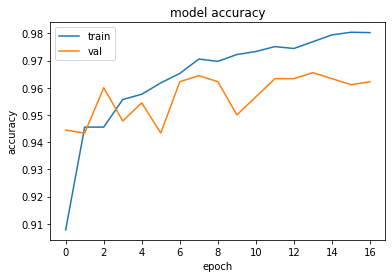

In [44]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

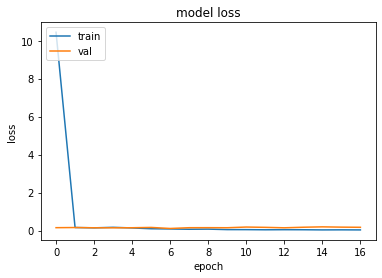

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [46]:
# Save neural network structure
model_structure = model.to_json()
f = Path("./model/model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("./model/model_weights.h5")

In [47]:
# Load data set
datapath = Path("../../covidx-cxr2-dataset/ttv-labelled-csv/test.csv")
df_data = pd.read_csv(datapath)
df_data.head(2)

,filepath,classification
0,A652157-01-22-1901-NA-CHEST_AP_PORT-58283-5.00...,positive
1,38ccf1a4-071c-4243-86b5-3f7d5db8df5c.png,negative


In [48]:
train_path = Path("../../covidx-cxr2-dataset/train")

images = []
labels = []

In [49]:


# Load all images
count = 0
for imagepath in train_path.glob("*.*"):
    # if count >= 3:
    #     break
    
    count = count + 1
    # Load the image from disk
    try:
        imagename = os.path.basename(imagepath)
        filedata_in_dataset = None
        labeldesc = None
        filedata_in_dataset = df_data[df_data['filepath'] == imagename].classification.values
        if len(filedata_in_dataset) == 1:
            labeldesc = filedata_in_dataset[0]
        else:
            continue
            
        img = image.load_img(imagepath, target_size=(224,224))
        print(img, count)
        # Convert the image to a numpy array
        image_array = image.img_to_array(img)

        # Add the image to the list of images
        images.append(image_array)
        if(labeldesc == 'negative'):
            # For each image, get the label
            labels.append(0)
        elif (labeldesc == 'positive'):
            labels.append(1)
        else:
            print("label incorrect for ", imagepath)
    except Exception as e: 
        print(e)
        #ignore if image not loaded or label not correct with printing name
        

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA11823A400> 63
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA0F8146BE0> 86
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA0F83573A0> 107
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA0F8357790> 121
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA0F8357670> 127
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA11823AF40> 134
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA0F854F4C0> 228
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA0F8357D30> 234
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA0F8357670> 240
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA0F8357F70> 258
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA0F8357670> 266
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=224x224 at 0x7FA0

In [50]:
np.unique(labels, return_counts=True)

(array([0, 1]), array([420, 480]))

In [51]:
# Create a single numpy array with all the images we loaded
x_test = np.array(images)

# Also convert the labels to a numpy array
y_true = np.array(labels)

In [52]:
# Normalize image data to 0-to-1 range
x_test = vgg16.preprocess_input(x_test)
x_test.shape

(900, 224, 224, 3)

In [53]:
# Given the test images, make a final prediction using our own model
results = model.predict(x_test)

#Process results
p_pred = results.flatten()

# extract the predicted class labels
y_pred = np.where(p_pred > 0.5, 1, 0)

29/29 [==============================] - 15s 510ms/step


In [54]:
import matplotlib

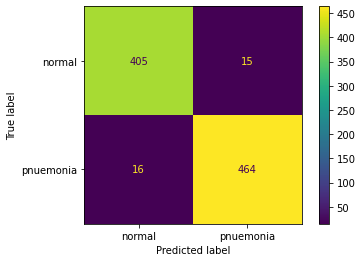

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = ['normal', 'pnuemonia']
cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9620    0.9643    0.9631       420
           1     0.9687    0.9667    0.9677       480

    accuracy                         0.9656       900
   macro avg     0.9653    0.9655    0.9654       900
weighted avg     0.9656    0.9656    0.9656       900

